In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class twobody():
    
    """"
    two body class that implements parameters using Lagrange equation for two bodies in cartesian
    
    Parameters:
    m1 : mass of first body
    m2 : mass of second body
    x1: x coordinate of first body
    y1: y coordinate of first body
    x2: x coordinate of second body
    y2: y coordinate of second body
    
    """
    
    def __init__(self, G, m1, m2):
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
    def diffr(self, p, q , r, s): #function that returnst the x differnce, p = x1 and q = x2 r = y1 and s = x2
        
        return(1./np.sqrt((q-p)**2 + (s-r)**2)**3)
    
    def indpos(self, a, b, c):  #function to get everything independent of position
    
        return(a * b * c )
    
    def dy_dt(self, t, y):
        
        # is the vector that stores x1[0], x2[2], y1[4], y2[6] and 
        #theirfirst time derivatives x1dot[1] x2dot[3] y1dot[5] y2dot[7]
        
        return[y[1],self.indpos(self.G, self.m1, self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[2]-y[0])/self.m1,\
               y[3],self.indpos(self.G, self.m1, self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[0]-y[2])/self.m2,\
               y[5],self.indpos(self.G, self.m1, self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[4]-y[6])/self.m1,\
               y[7],self.indpos(self.G, self.m1, self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[6]-y[4])/self.m2]
        
    def solve_ode(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, atol=abserr, rtol=relerr)
        
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = solution.y
        
        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):   
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 200.
m2 = 1.
G = 1.
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
x2_0, x2_dot_0 = -(m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0

# Instantiate a pendulum 
p1 = twobody( G= G, m1 = m1, m2 = m2 )

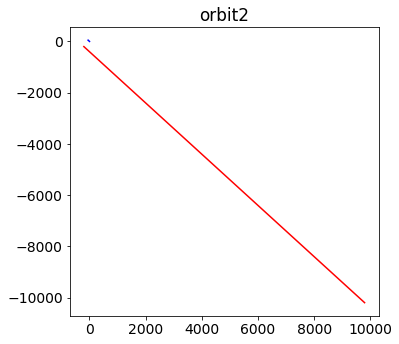

In [7]:
x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot = p1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, \
                                                          y1_0, y1_dot_0, y2_0, y2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start:stop], y1[start:stop], 
            axis_labels=None, 
            color='blue',
            label=None, 
            title=r'orbit1', 
            ax=ax_a)    
plot_y_vs_x(x2[start:stop], y2[start:stop], 
            axis_labels=None, 
            color='red',
            label=None, 
            title=r'orbit2', 
            ax=ax_a)    

fig.tight_layout()